The idea in this project is to predict the housing price in the Ames Lowa using Principal Component Analyses (PCA)
For this project I will be using the data train.csv extrated in kaggle.com 

In [2]:
# so let's start by import the important python libraries  for this project 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# configure pandas display settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# load the data and see the first 5 element 
data=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\Unsupervisor_learning\\PCA\\train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# see the columns name and shape of my data
print (data.columns)
print (data.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

 As we can see, we have 81 columns and 1460 row in our data and each columns describe the name of variable 

In [4]:
# looking for mor information in my data by printing data.info() function 

In [5]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1. Explore Basic statistic of each  feature 

In [6]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
data.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [8]:
data.LotArea.mean()

10516.828082191782

In [9]:
 data.cov()

Id     MSSubClass    LotFrontage       LotArea  \
Id             177755.000000     198.968472    -108.390207 -1.398197e+05   
MSSubClass        198.968472    1789.338306    -404.439075 -5.901742e+04   
LotFrontage      -108.390207    -404.439075     589.749169  8.199814e+04   
LotArea       -139819.667238  -59017.418634   81998.138404  9.962565e+07   
OverallQual       -16.539068       1.908771       8.673047  1.460548e+03   
OverallCond         5.915696      -2.792117      -1.573935 -6.260287e+01   
YearBuilt        -161.881768      35.581337      95.108483  4.289113e+03   
YearRemodAdd     -191.474297      35.439934      45.744675  2.841344e+03   
MasVnrArea      -3842.687941     175.837842     871.207424  1.884014e+05   
BsmtFinSF1       -966.102125   -1347.355751    2635.952669  9.746908e+05   
BsmtFinSF2       -405.884167    -447.979166     187.215374  1.790022e+05   
BsmtUnfSF       -1479.131254   -2630.967059    1445.358556 -1.154799e+04   
TotalBsmtSF     -2851.117546   -4426.301975    4268.526599  1.142145e+06   
1stFlrSF         1710.741947   -4116.974635    4288.431435  1.155563e+06   
2ndFlrSF         1028.782385    5685.233633     847.261336  2.221512e+05   
LowQualFinSF     -906.713160      95.586483      47.977276  2.319329e+03   
GrLivArea        1832.811172    1663.845480    5183.670047  1.380033e+06   
BsmtFullBath        0.500685       0.076629       1.271142  8.191431e+02   
BsmtHalfBath       -2.028787      -0.023557      -0.041039  1.144952e+02   
FullBath            1.297807       3.067005       2.661649  6.930218e+02   
HalfBath            1.438314       3.772743       0.649849  7.157444e+01   
BedroomAbvGr       12.972927      -0.808797       5.177661  9.745747e+02   
KitchenAbvGr        0.274160       2.625762      -0.034248 -3.911125e+01   
TotRmsAbvGrd       18.666210       2.776334      13.934064  3.082701e+03   
Fireplaces         -5.373886      -1.242665       4.069732  1.746115e+03   
GarageYrBlt         0.752557      86.172938      44.022081 -6.291694e+03   
GarageCars          5.220699      -1.267945       5.397615  1.155204e+03   
GarageArea       1589.548663    -892.392035    1853.024435  3.849872e+05   
WoodDeckSF      -1566.467786     -66.694532     258.788887  2.148006e+05   
OpenPorchSF       -13.322138     -17.096613     243.868123  5.606253e+04   
EnclosedPorch      74.450651     -31.119180      16.022614 -1.118809e+04   
3SsnPorch        -576.428376     -54.348569      48.936214  5.976211e+03   
ScreenPorch        31.270391     -61.394007      56.264418  2.402002e+04   
PoolArea          966.275531      14.076652     194.586364  3.114821e+04   
MiscVal         -1305.726525    -161.243759      15.520479  1.885087e+05   
MoSold             24.133653      -1.553607       0.735389  3.251734e+01   
YrSold              0.398561      -1.202630       0.240700 -1.890502e+02   
SalePrice     -734073.217958 -283233.737229  712426.165978  2.092111e+08   

                OverallQual  OverallCond     YearBuilt   YearRemodAdd  \
Id               -16.539068     5.915696 -1.618818e+02    -191.474297   
MSSubClass         1.908771    -2.792117  3.558134e+01      35.439934   
LotFrontage        8.673047    -1.573935  9.510848e+01      45.744675   
LotArea         1460.548271   -62.602871  4.289113e+03    2841.343594   
OverallQual        1.912679    -0.141484  2.390622e+01      15.723417   
OverallCond       -0.141484     1.238322 -1.263671e+01       1.694152   
YearBuilt         23.906215   -12.636709  9.122154e+02     369.675456   
YearRemodAdd      15.723417     1.694152  3.696755e+02     426.232822   
MasVnrArea       103.012054   -25.818956  1.725993e+03     671.676358   
BsmtFinSF1       151.176998   -23.464270  3.437028e+03    1209.532821   
BsmtFinSF2       -13.189617     7.221779 -2.392637e+02    -225.669866   
BsmtUnfSF        188.316066   -67.285775  1.989043e+03    1652.390761   
TotalBsmtSF      326.303447   -83.528266  5.186807e+03    2636.253717   
1stFlrSF         254.612835   -62.03525

<AxesSubplot:xlabel='LotArea'>

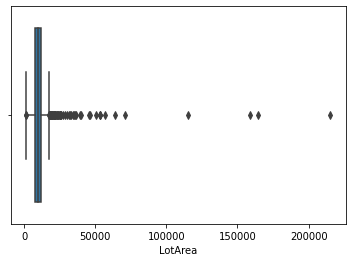

In [10]:
import seaborn as sns
sns.boxplot(x=data['LotArea'])

<AxesSubplot:xlabel='PoolArea'>

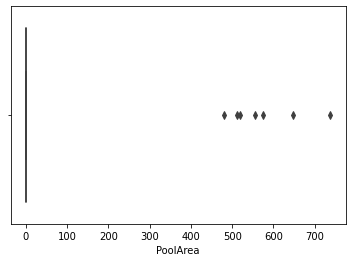

In [11]:
sns.boxplot(x=data['PoolArea'])


Scatter plot

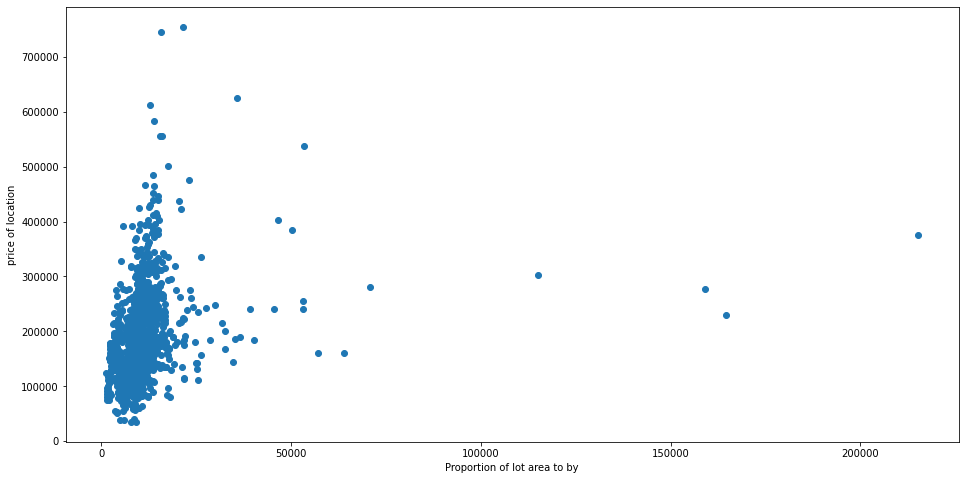

In [12]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['LotArea'], data['SalePrice'])
ax.set_xlabel('Proportion of lot area to by')
ax.set_ylabel('price of location')
plt.show()

In [13]:
 # Points which are far from the population like top right corner are considered outiler 


finding outiler using IQR score -

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [15]:
print(data< (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

      1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  \
0        False     False      False  False         False     False     False   
1        False     False      False  False         False     False     False   
2        False     False      False  False         False     False     False   
3        False     False      False  False         False     False     False   
4        False     False      False  False         False     False     False   
5        False     False      False  False         False     False     False   
6        False     False      False  False         False     False     False   
7        False     False      False  False         False     False     False   
8        False     False      False  False         False     False     False   
9        False     False      False  False         False     False     False   
10       False     False      False  False         False     False     False   
11       False     False      False  Fal

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

# 2 Outlier Detection 

 # A : Pick your own method to remove outliers

I will pick up the IQR Score method to remove outlires .
I Will create a new variable and call it data as well, but now these new data variable will have not outlires .


In [16]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pave   NaN      Reg   
54      55          80       RL         60.0     7134   Pave   NaN      Reg   
57      58          60       RL         89.0    11645   Pave   NaN      IR1   
59      60          20       RL         60.0     7200   Pave   NaN      Reg   
60      61          20       RL         63.0    13072   Pave   NaN      Reg   
62      63         120       RL         44.0     6442   Pave   NaN      IR1   
65      66          60       RL         76.0     9591   Pave   NaN      Reg   
67      68          20       RL         72.0    10665   Pave   NaN      IR1   
68      69          30       RM         47.0     4608   Pave   NaN      Reg   
71      72          20       RL         69.0     7599   Pave   NaN      Reg   
76      77          20       RL          NaN     8475   Pave   NaN      IR1   
83      84          20       RL         80.0     8892   Pave   NaN      IR1   
89      90          20       RL         60.0     8070   Pave   NaN      Reg   
94      95          60       RL         69.0     9337   Pave   NaN      IR1   
96      97          20       RL         78.0    10264   Pave   NaN      IR1   
97      98          20       RL         73.0    10921   Pave   NaN      Reg   
100    101          20       RL          NaN    10603   Pave   NaN      IR1   
101    102          60       RL         77.0     9206   Pave   NaN      Reg   
103    104          20       RL         94.0    10402   Pave   NaN      IR1   
110    111          50       RL         75.0     9525   Pave   NaN      Reg   
111    112          80       RL          NaN     7750   Pave   NaN      IR1   
117    118          20       RL         74.0     8536   Pave   NaN      Reg   
119    120          60       RL         65.0     8461   Pave   NaN      Reg   
123    124         120       RL         55.0     7892   Pave   NaN      Reg   
124    125          20       RL         48.0    17043   Pave   NaN      IR1   
127    128          45       RM         55.0     4388   Pave   NaN      IR1   
128    129          60       RL         69.0     7590   Pave   NaN      Reg   
130    131          60       RL         88.0    14200   Pave   NaN      Reg   
131    132          60       RL          NaN    12224   Pave   NaN      IR1   
132    133          20       RL         75.0     7388   Pave   NaN      Reg   
133    134          20       RL          NaN     6853   Pa

In [17]:
print(data.shape)
print (data.shape) # As we can see, the new data has less row

(563, 81)
(563, 81)


In [18]:
# as we can see after eliminate outiler using the IQR  method we get less 897 row

# B Explain  the rationale

I chose the IQR because it's a measure of the dispersion  much more robust against outliers when compared with others method similary
In this method the first and third quartiles are unaffected and thus the interquartile range does not change even when we have quite drastic shifts of  values

https://www.thoughtco.com/what-is-the-interquartile-range-3126245

# 3 Missing Value Imputations

# A : Use your method of choice for imputation

In [277]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      107
LotArea            0
Street             0
Alley            542
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         5
MasVnrArea         5
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       1
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

As we can see, we have a lot of missing value in some columns like MiscFeature column,Fence, PoolQC and Alley

Initialize KNNImputer



In [104]:
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=2)

In [279]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

#-=========================\
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(data)
#imputed_data = imp_mean.transform(data_out)

display(pd.DataFrame(imp_mean.transform(data)))

0    1   2    3      4     5     6    7    8       9        10   11  \
0       1   60  RL   65   8450  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
1       3   60  RL   68  11250  Pave  Grvl  IR1  Lvl  AllPub   Inside  Gtl   
2       5   60  RL   84  14260  Pave  Grvl  IR1  Lvl  AllPub      FR2  Gtl   
3       7   20  RL   75  10084  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
4      11   20  RL   70  11200  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
5      14   20  RL   91  10652  Pave  Grvl  IR1  Lvl  AllPub   Inside  Gtl   
6      19   20  RL   66  13695  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
7      20   20  RL   70   7560  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
8      21   60  RL  101  14215  Pave  Grvl  IR1  Lvl  AllPub   Corner  Gtl   
9      24  120  RM   44   4224  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
10     28   20  RL   98  11478  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
11     32   20  RL   60   8544  Pave  Grvl  IR1  Lvl  AllPub  CulDSac  Gtl   
12     33   20  RL   85  11049  Pave  Grvl  Reg  Lvl  AllPub   Corner  Gtl   
13     35  120  RL   60   7313  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
14     36   60  RL  108  13418  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
15     39   20  RL   68   7922  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
16     41   20  RL   84   8658  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
17     46  120  RL   61   7658  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
18     48   20  FV   84  11096  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
19     50   20  RL   66   7742  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
20     55   80  RL   60   7134  Pave  Grvl  Reg  Bnk  AllPub   Inside  Mod   
21     58   60  RL   89  11645  Pave  Grvl  IR1  Lvl  AllPub   Corner  Gtl   
22     60   20  RL   60   7200  Pave  Grvl  Reg  Bnk  AllPub   Inside  Gtl   
23     61   20  RL   63  13072  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
24     63  120  RL   44   6442  Pave  Grvl  IR1  Lvl  AllPub   Inside  Gtl   
25     66   60  RL   76   9591  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
26     68   20  RL   72  10665  Pave  Grvl  IR1  Lvl  AllPub   Inside  Gtl   
27     69   30  RM   47   4608  Pave  Grvl  Reg  Lvl  AllPub   Corner  Gtl   
28     72   20  RL   69   7599  Pave  Grvl  Reg  Lvl  AllPub   Corner  Gtl   
29     77   20  RL   60   8475  Pave  Grvl  IR1  Lvl  AllPub   Inside  Gtl   
30     84   20  RL   80   8892  Pave  Grvl  IR1  Lvl  AllPub   Inside  Gtl   
31     90   20  RL   60   8070  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
32     95   60  RL   69   9337  Pave  Grvl  IR1  Lvl  AllPub   Inside  Gtl   
33     97   20  RL   78  10264  Pave  Grvl  IR1  Lvl  AllPub   Inside  Gtl   
34     98   20  RL   73  10921  Pave  Grvl  Reg  HLS  AllPub   Inside  Gtl   
35    101   20  RL   60  10603  Pave  Grvl  IR1  Lvl  AllPub   Inside  Gtl   
36    102   60  RL   77   9206  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
37    104   20  RL   94  10402  Pave  Grvl  IR1  Lvl  AllPub   Corner  Gtl   
38    111   50  RL   75   9525  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
39    112   80  RL   60   7750  Pave  Grvl  IR1  Lvl  AllPub   Inside  Gtl   
40    118   20  RL   74   8536  Pave  Grvl  Reg  Lvl  AllPub   Corner  Gtl   
41    120   60  RL   65   8461  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
42    124  120  RL   55   7892  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
43    125   20  RL   48  17043  Pave  Grvl  IR1  Lvl  AllPub  CulDSac  Gtl   
44    128   45  RM   55   4388  Pave  Grvl  IR1  Bnk  AllPub   Inside  Gtl   
45    129   60  RL   69   7590  Pave  Grvl  Reg  Lvl  AllPub   Inside  Gtl   
46    131   60  RL   88  14200  Pave  Grvl  Reg  Lvl  AllPub   Corner  Gtl   
47    132   60  RL   60  12224  Pave  Grvl  IR1  Lvl  AllPub   Corner  Gtl   
48    133   20  RL   75   7388  Pave  Grvl  Reg  Lvl  AllPub   Corner  Gtl   
49    134   20  RL   60   6853  Pave  Grvl  IR1  Lvl  AllPub   Inside  Gtl   
50    136   20  RL   80  1040

In [280]:
data.shape

(563, 81)

In [282]:
# data.isnull().sum()

In [ ]:
# I use the (Most Frequent) or (Zero/Constant) Values for Imputation my missing value


I used this method because  It's work with categorical features (strings or numerical representations) by replacing missing data with the most frequent values within each column
also this method 

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

# 4 Correlation Analysis

# A: Identify the target variable correctly

The target variable correctly is  Sale Price because every variable in my sample of data depend in price. because if we want to buy a house usually 90% of client will look at the price first of all.

# B Isolate the feature with high correlaction  with target variable 

 Find out  which features are strongly correlated with SalePrice. 

In [283]:
# I will considered only variable with igual or more than 60% of correlaction as strong correlaction with my target variable 

#===========================

data_corr = data.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
features_corrlact = data_corr[abs(data_corr) > 0.6].sort_values(ascending=False)
print("There are {} strongly correlated values with SalePrice which are:\n{}".format(len(features_corrlact), features_corrlact))


There are 8 strongly correlated values with SalePrice which are:
OverallQual     0.835833
GrLivArea       0.761613
GarageCars      0.711438
GarageArea      0.701768
YearBuilt       0.679732
FullBath        0.673508
GarageYrBlt     0.641270
YearRemodAdd    0.600514
Name: SalePrice, dtype: float64


 #                           Feature Preparation and Transformation 

# 1 Drop  unnecessary  columns (all categorical variables,essentialy )

In [20]:
# Extract Numerical Columns
# I will create a new variable call data_num for all numerical variable
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 1455
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             563 non-null    int64  
 1   MSSubClass     563 non-null    int64  
 2   LotFrontage    456 non-null    float64
 3   LotArea        563 non-null    int64  
 4   OverallQual    563 non-null    int64  
 5   OverallCond    563 non-null    int64  
 6   YearBuilt      563 non-null    int64  
 7   YearRemodAdd   563 non-null    int64  
 8   MasVnrArea     558 non-null    float64
 9   BsmtFinSF1     563 non-null    int64  
 10  BsmtFinSF2     563 non-null    int64  
 11  BsmtUnfSF      563 non-null    int64  
 12  TotalBsmtSF    563 non-null    int64  
 13  1stFlrSF       563 non-null    int64  
 14  2ndFlrSF       563 non-null    int64  
 15  LowQualFinSF   563 non-null    int64  
 16  GrLivArea      563 non-null    int64  
 17  BsmtFullBath   563 non-null    int64  
 18  BsmtHalfB

In [21]:
# extate the object columns\
# I will create a new variable call data_object for all object variable
data_object = [col for col in data.columns if data[col].dtype == "object"]

In [22]:
data_object

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [23]:
# drop the column names which dont make sense 
# for that i will use just numerical data.. so i will work with may data_num
data_num.drop(['Id'],axis=1,inplace=True)

C:\Users\marce\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
data_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           60         65.0     8450            7            5       2003   
2           60         68.0    11250            7            5       2001   
4           60         84.0    14260            8            5       2000   
6           20         75.0    10084            8            5       2004   
10          20         70.0    11200            5            5       1965   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           2003       196.0         706           0        150          856   
2           2002       162.0         486           0        434          920   
4           2000       350.0         655           0        490         1145   
6           2005       186.0        1369           0        317         1686   
10          1965         0.0         906           0        134         1040   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0        856       854             0       1710             1             0   
2        920       866             0       1786             1             0   
4       1145      1053             0       2198             1             0   
6       1694         0             0       1694             1             0   
10      1040         0             0       1040             1             0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0          2         1             3             1             8           0   
2          2         1             3             1             6           1   
4          2         1             4             1             9           1   
6          2         0             3             1             7           1   
10         1         0             3             1             5           0   

    GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0        2003.0           2         548           0           61   
2        2001.0           2         608           0           42   
4        2000.0           3         836         192           84   
6        2004.0           2         636         255           57   
10       1965.0           1         384           0            0   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0               0          0            0         0        0       2    2008   
2               0          0            0         0        0       9    2008   
4               0          0            0         0        0      12    2008   
6               0          0            0         0        0       8    2007   
10              0          0            0         0        0       2    2008   

    SalePrice  
0      208500  
2      223500  
4      250000  
6      307000  
10     129500

In [25]:
# loking for missing value im my numerical dtype and use 
data_num.isnull().sum()

MSSubClass         0
LotFrontage      107
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       23
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [26]:
# As we can see we have two variable with missing value GarageYrBlt and LotFrontage 
## let's fill the variable using the mediam method value 




for col in data_num:
    data_num[col] = data_num[col].fillna(data_num[col].median())

<ipython-input-26-eefcbe6d7ba7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num[col] = data_num[col].fillna(data_num[col].median())


In [27]:
# looking for missing value after apply the median method .
# As we can see below, we do not have missing value now.
data_num.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# 2 Apply Scaling  to dataset  to bring all variables to  the same  scale

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(data_num)
scaled_data=scaler.transform(data_num)

#min_max_scaler = MinMaxScaler()

#min_max_scaler.fit(data_num)

In [82]:
# get scaled data 
data_scaled = pd.DataFrame(min_max_scaler.transform(data_num))


In [83]:
data_scaled.describe()

0           1           2           3           4           5   \
count  563.000000  563.000000  563.000000  563.000000  563.000000  563.000000   
mean     0.288277    0.490107    0.430652    0.530639    0.455299    0.740585   
std      0.314500    0.171254    0.185347    0.156432    0.234704    0.253687   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.392405    0.330252    0.375000    0.333333    0.560606   
50%      0.300000    0.500000    0.416706    0.500000    0.333333    0.868687   
75%      0.400000    0.569620    0.537824    0.625000    0.666667    0.949495   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8      9           10          11  \
count  563.000000  563.000000  563.000000  563.0  563.000000  563.000000   
mean     0.653937    0.179281    0.274970    0.0    0.370547    0.458953   
std      0.326509    0.255412    0.253501    0.0    0.254432    0.172742   
min      0.000000    0.000000    0.000000    0.0    0.000000    0.000000   
25%      0.366667    0.000000    0.000000    0.0    0.167665    0.338728   
50%      0.816667    0.000000    0.273008    0.0    0.310778    0.427746   
75%      0.916667    0.344578    0.459543    0.0    0.528743    0.579191   
max      1.000000    1.000000    1.000000    0.0    1.000000    1.000000   

               12          13     14          15          16     17  \
count  563.000000  563.000000  563.0  563.000000  563.000000  563.0   
mean     0.404788    0.229049    0.0    0.452668    0.212256    0.0   
std      0.173063    0.308840    0.0    0.181065    0.249146    0.0   
min      0.000000    0.000000    0.0    0.000000    0.000000    0.0   
25%      0.259976    0.000000    0.0    0.312729    0.000000    0.0   
50%      0.371650    0.000000    0.0    0.454212    0.000000    0.0   
75%      0.522335    0.539659    0.0    0.564332    0.500000    0.0   
max      1.000000    1.000000    0.0    1.000000    1.000000    0.0   

               18          19          20     21          22          23  \
count  563.000000  563.000000  563.000000  563.0  563.000000  563.000000   
mean     0.303730    0.383659    0.602131    0.0    0.472723    0.275311   
std      0.251551    0.486709    0.220489    0.0    0.187896    0.290192   
min      0.000000    0.000000    0.000000    0.0    0.000000    0.000000   
25%      0.000000    0.000000    0.333333    0.0    0.285714    0.000000   
50%      0.500000    0.000000    0.666667    0.0    0.428571    0.500000   
75%      0.500000    1.000000    0.666667    0.0    0.571429    0.500000   
max      1.000000    1.000000    1.000000    0.0    1.000000    1.000000   

               24          25          26          27          28     29  \
count  563.000000  563.000000  563.000000  563.000000  563.000000  563.0   
mean     0.757429    0.606868    0.514872    0.224856    0.242618    0.0   
std      0.230105    0.222712    0.201003    0.244520    0.264761    0.0   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
25%      0.583333    0.666667    0.420259    0.000000    0.000000    0.0   
50%      0.869792    0.666667    0.517241    0.242574    0.194118    0.0   
75%      0.937500    0.666667    0.620690    0.413366    0.376471    0.0   
max      1.000000    1.000000    1.000000    1.000000    1.000000    0.0   

          30     31     32     33          34          35          36  
count  563.0  563.0  563.0  563.0  563.000000  563.000000  563.000000  
mean     0.0    0.0    0.0    0.0    0.485548    0.447158    0.468519  
std      0.0    0.0    0.0    0.0    0.241880    0.330441    0.186004  
min      0.0    0.0    0.0    0.0    0.000000    0.000000    0.000000  
25%      0.0    0.0    0.0    0.0    0.363636    0.250000    0.329882  
50%      0.0    0.0    0.0    0.0    0.454545    0.500000    0.457512  
75%      0.0    0.0    0.0    0.0    0.636364    0.750000    0.583402  
max      0.0  

# PCA

In [84]:
data_scaled.shape

(563, 37)

In [85]:
# import PCA from decomposition
from sklearn.decomposition import PCA

# create the PCA object to use to fit the given data
pca = PCA()
pca.fit(data_scaled)

PCA()

In [64]:
#np.where(data_scaled.values >= np.finfo(np.float64).max)

In [86]:
pca.fit(data_scaled)

PCA()

In [87]:
# Principal axes in feature space, representing the directions of maximum variance in the data.
print(pca.components_)

[[ 1.31819336e-01  7.17934473e-02  8.13650861e-02 ...  1.49782856e-02
  -2.50263122e-02  2.09076306e-01]
 [-6.80824453e-03  1.27166647e-03  3.80557246e-02 ... -3.28629017e-02
  -3.68397566e-02 -1.42610761e-01]
 [ 2.36593665e-01 -4.31443630e-02 -1.35316772e-02 ... -6.71347322e-02
   2.43868173e-01  5.22673259e-02]
 ...
 [-0.00000000e+00 -8.34454670e-49  9.35930858e-49 ... -5.36444455e-49
  -3.66943605e-49 -2.29743113e-48]
 [-0.00000000e+00  8.80951286e-49 -1.65992317e-48 ... -4.95833214e-49
  -3.08961276e-49 -5.83511517e-51]
 [-0.00000000e+00  2.22711452e-16 -3.09995060e-16 ...  9.51991536e-17
   8.73625298e-17  1.75695873e-16]]


In [88]:
# Percentage of variance explained by each of the selected components
print(pca.explained_variance_)


[4.88237050e-01 2.87016567e-01 1.65745841e-01 1.36660103e-01
 1.13220651e-01 1.02458113e-01 6.42168110e-02 5.57465394e-02
 5.27597899e-02 4.88169364e-02 4.55278211e-02 4.33523012e-02
 3.75446822e-02 2.91204726e-02 2.13712277e-02 2.03014087e-02
 1.64990789e-02 1.57682567e-02 1.49027922e-02 1.19667486e-02
 7.76817603e-03 6.94864750e-03 5.41467253e-03 4.15017661e-03
 2.69836084e-03 2.59522967e-03 9.62877803e-32 5.01378795e-33
 2.21346958e-33 2.21346958e-33 2.21346958e-33 2.21346958e-33
 2.21346958e-33 2.21346958e-33 2.21346958e-33 2.21346958e-33
 1.10656782e-33]


In [89]:
print(pca.explained_variance_ratio_)

[2.71121034e-01 1.59382063e-01 9.20396839e-02 7.58881947e-02
 6.28721233e-02 5.68956196e-02 3.56599897e-02 3.09563958e-02
 2.92978355e-02 2.71083448e-02 2.52818788e-02 2.40737993e-02
 2.08487927e-02 1.61707774e-02 1.18675741e-02 1.12734970e-02
 9.16203991e-03 8.75620984e-03 8.27561207e-03 6.64520903e-03
 4.31371588e-03 3.85862665e-03 3.00680093e-03 2.30461857e-03
 1.49841635e-03 1.44114698e-03 5.34691960e-32 2.78418726e-33
 1.22915326e-33 1.22915326e-33 1.22915326e-33 1.22915326e-33
 1.22915326e-33 1.22915326e-33 1.22915326e-33 1.22915326e-33
 6.14483908e-34]


In [90]:
print(pca.singular_values_)


[1.65646981e+01 1.27005240e+01 9.65138138e+00 8.76373081e+00
 7.97684186e+00 7.58824482e+00 6.00748265e+00 5.59728105e+00
 5.44527336e+00 5.23785436e+00 5.05832339e+00 4.93598960e+00
 4.59348576e+00 4.04545493e+00 3.46563558e+00 3.37777910e+00
 3.04507510e+00 2.97687088e+00 2.89402301e+00 2.59332079e+00
 2.08942933e+00 1.97614268e+00 1.74443285e+00 1.52721945e+00
 1.23145393e+00 1.20769163e+00 7.35620368e-15 1.67861515e-15
 1.11533399e-15 1.11533399e-15 1.11533399e-15 1.11533399e-15
 1.11533399e-15 1.11533399e-15 1.11533399e-15 1.11533399e-15
 7.88600731e-16]


In [91]:

print(pca.mean_)

[0.28827709 0.49010725 0.43065225 0.53063943 0.45529899 0.74058525
 0.65393724 0.17928053 0.27496964 0.         0.37054701 0.45895338
 0.40478823 0.22904935 0.         0.45266804 0.21225577 0.
 0.30373002 0.38365897 0.60213144 0.         0.47272266 0.27531083
 0.75742858 0.60686797 0.51487184 0.22485623 0.24261833 0.
 0.         0.         0.         0.         0.4855482  0.44715808
 0.46851932]


<AxesSubplot:>

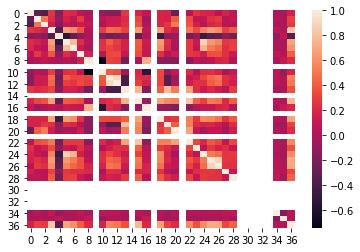

In [92]:
import seaborn as sns

sns.heatmap(data_scaled.corr())

# 1 Threshold for variance (90%-industry standard )

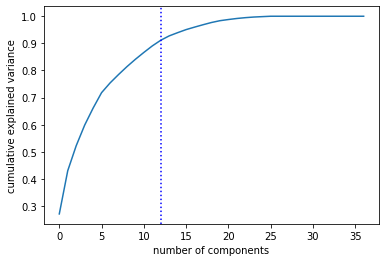

In [93]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.axvline(12,linestyle=':',label='n_components=90%',c='blue')






This curve quantifies show as that for 64-dimensional variance is contained within the first N components.
For example, for 90% of the variance, we need the first 12 components approximately 
and for 100% of the variance we need approximately 30 components
the 12 mean .. 12 vector eigenvetor used to explan 90% of variance

In [94]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [95]:

pca = PCA(12)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)


(1797, 64)
(1797, 12)


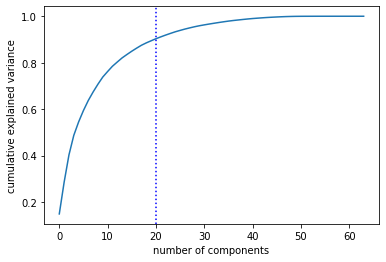

In [75]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.axvline(20,linestyle=':',label='n_components=90%',c='blue')

# 2 balance the number of feature selected 

In [96]:
# pca for 3 dimention 
scaled_data=scaler.transform(data_num)
pca=PCA(n_components=3)
pca.fit(scaled_data)


PCA(n_components=3)

In [99]:
# transfom the data into 2 principal component 
transf_data=pca.transform(scaled_data)

In [100]:
print(transf_data.shape)
print (scaled_data.shape)

(563, 3)
(563, 37)


Text(0, 0.5, 'second principal component')

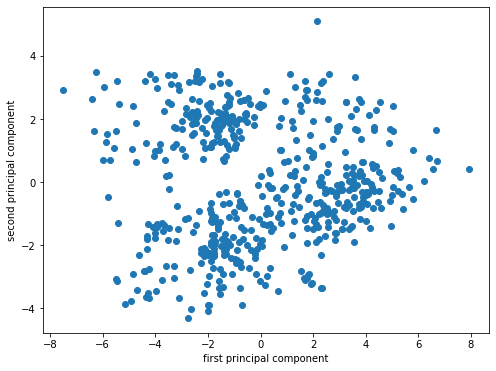

In [101]:
# plot my tranf dta

plt.figure(figsize=(8,6))
plt.scatter(transf_data[:,0],transf_data[:,1],cmap='plasma')
plt.xlabel('first principal component')
plt.ylabel('second principal component')

In [103]:
print(pca.explained_variance_ratio_)

[0.29524666 0.13268814 0.0877667 ]


In [104]:
print(pca.explained_variance_.sum())

14.465335298062852


# LINEAR REGRESSION 

# fit the model  to cleaned-up datase

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# QUESTION.. FOR MY LINEAR REGRESSION I USE scaled_data OR data_num

In [114]:
#considering only the highly correlated features for training and validation
X = data_num.drop(['SalePrice'], axis = 1)
y = data_num['SalePrice']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [115]:
ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [110]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(train_x)

ln_reg.fit(X_pca,train_y)

LinearRegression()

In [117]:
# pretict test result to see if i have acurat result
y_pred=ln_reg.predict(x_test)
print (y_pred)

[246642.13004253 201144.19833184 236811.784782   191455.94827331
 198743.70050203 204478.32219709  84706.93786587 208149.67316263
 203675.74739822  62181.91872764 162658.20417684 199491.52720256
 169682.63903619 196321.51062324 168375.1170733  140287.30044322
 248398.46921977 299764.19649853 150713.81682632 127372.68619935
 238903.53454811 136186.22721234 171820.71851335 179919.80030606
 200654.30877402 186738.33095832 186994.86548835 200827.50702855
 119190.2459497  102691.98018668 231980.22804572 276369.21285002
 177253.27617918 175979.82801344 228292.19793581 233609.62275963
 203852.60620114 289003.33044679 110735.4293728  229089.94914386
 129792.58935848 270371.13442738 122941.47271596 212566.39547027
 301123.80650617 315658.47575546 148241.03508287 178491.53947487
 166438.82543064 240024.76459869 135134.197382   159997.16554993
  88916.6760185  239866.54439201 131793.13527438 264939.496432
 119623.16240655 124100.2481316  223111.39917213  82766.13634073
 185353.86185242 151012.955

In [118]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
r2_score(y_test,y_pred)

0.8899508125019491

Text(0.5, 1.0, 'atual_preditc')

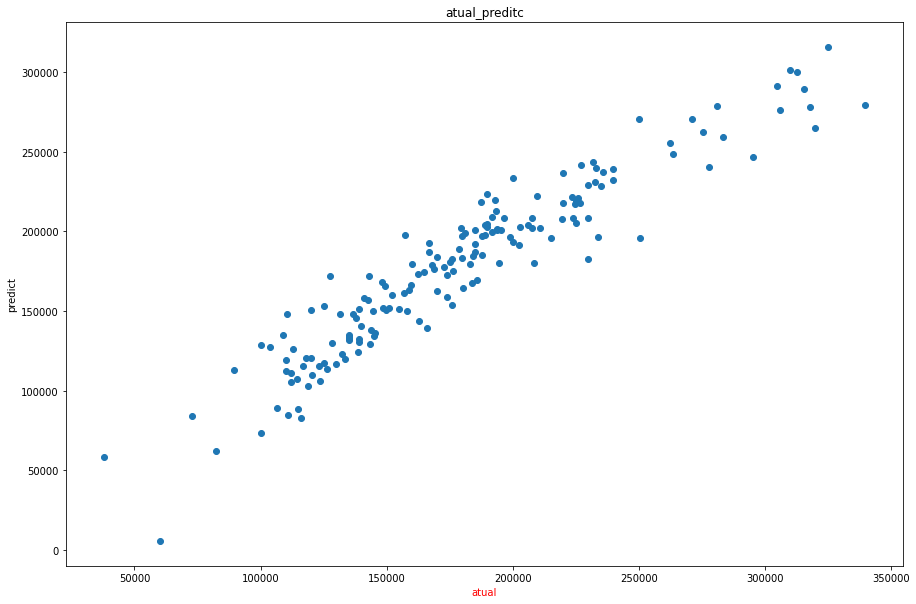

In [119]:
plt.figure(figsize=(15,10))
plt.scatter (y_test,y_pred)
plt.xlabel('atual', color='red' )
plt.ylabel('predict')
plt.title('atual_preditc')